<div align="center">

# Группировка объектов по сходству с использованием k-средних

</div>

---


# Кластеризация и метод k-средних

## Определение кластеризации

* **Кластеризация (кластерный анализ)** — метод **обучения без учителя**, цель которого:

  * найти скрытые структуры в данных;
  * сгруппировать объекты так, чтобы внутри группы объекты были более похожи друг на друга, чем на объекты из других групп.
* Используется, когда **нет меток классов** (иначе это было бы обучение с учителем).

## Применения кластеризации

* Группировка документов, музыки, фильмов по темам.
* Сегментация клиентов по поведению и интересам → основа рекомендательных систем.
* Поиск скрытых закономерностей в многомерных данных.

## Метод k-средних

* Один из самых **популярных и простых** алгоритмов кластеризации.
* Относится к **кластеризации на основе прототипов**:

  * каждый кластер представлен **центроидом** (среднее по признакам) или **медоидом** (наиболее репрезентативная точка).
* Эффективен вычислительно → применяется и в науке, и в индустрии.

## Недостатки метода k-средних

* Нужно заранее задать количество кластеров **k**.
* Чувствителен к неправильному выбору **k**.
* Хорошо работает для **сферических кластеров**, но хуже — для сложных форм.

### Методы подбора k:

* **Метод локтя** — анализ кривой ошибки (SSE).
* **Силуэтный коэффициент** — мера качества кластеризации.

## Алгоритм k-средних (шаги)

1. Случайным образом выбрать k центроидов.
2. Отнести каждую точку к ближайшему центроиду.
3. Пересчитать центроиды как среднее точек внутри кластера.
4. Повторять шаги 2–3, пока:

   * кластеры не перестанут меняться,
   * или не будет достигнут лимит итераций.

## Мера сходства между объектами

* Сходство = величина, обратная расстоянию.
* Для непрерывных признаков: **Евклидово расстояние**

$$
d(x,y)^2 = \sum_{j=1}^m (x_j - y_j)^2 = ||x-y||^2
$$

* Это **мера "несхожести"** между точками. Чем больше расстояние, тем меньше схожесть.
* В k-средних мы используем это расстояние, чтобы определить, **к какому центроиду ближе всего точка**.

## Функция оптимизации (целевая функция)

* Алгоритм минимизирует **внутрикластерную сумму квадратов ошибок (SSE)**, или **инерцию**:

$$
SSE = \sum_{i=1}^n \sum_{j=1}^k w(i,j) ||x^{(i)} - \mu_j||^2
$$

где:

* $x^{(i)}$ — объект данных, $\mu_j$ — центроид кластера j.
* $w(i,j) = 1$, если точка $x^{(i)}$ принадлежит кластеру j, иначе 0.
* SSE = **сумма квадратов Евклидовых расстояний каждой точки до своего центроида**.

Связь между **мерой сходства** и **функцией оптимизации**:
* Евклидово расстояние измеряет **разброс точки относительно центра**.
* SSE агрегирует этот разброс для **всех точек и всех кластеров**.
* Минимизируя SSE, мы **делаем точки внутри кластера максимально близкими друг к другу**, что и является целью кластеризации.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

In [7]:
# Применение k-средних на демонстрационных данных для понимания
X, y = make_blobs(n_samples = 150,
                  n_features = 2,
                  centers = 3,
                  cluster_std = 0.5,
                  shuffle = True,
                  random_state = 0)


km = KMeans(n_clusters = 3, # Желаемое кол-во кластеров
            init = 'random', # Начальные центроиды выбираются случайным образом из объектов данных
            n_init = 10, # Многократные запуски для устойчивости
            max_iter = 300, # Ограничение итераций
            tol = 1e-04, # Критерий сходимости
            random_state = 0) # Каждый запуск с этим значением будет давать одинаковый результат
y_km = km.fit_predict(X)

### Количества кластеров

* Параметр **k** задаётся заранее (один из ограничений метода).
* Неправильный выбор k → плохое качество кластеризации.

### Многократные запуски для устойчивости

* **n\_init** — количество независимых запусков с разными случайными центроидами.
* Выбирается модель с **минимальным SSE**.
* Пример: `n_init = 10` → 10 запусков, выбираем лучший результат.

### Ограничение итераций

* **max\_iter** — максимальное число итераций на один запуск.
* Алгоритм **может сойтись раньше**, если достигнут критерий сходимости.
* Проблема: большое `max_iter` → высокие вычислительные затраты.

### Критерий сходимости

* **tol** — допуск минимальных изменений SSE для остановки алгоритма.
* Пример: `tol = 1e-4` → алгоритм остановится, если SSE изменяется меньше 0.0001 между итерациями.

### Обработка пустых кластеров

* Возможна ситуация, когда **кластер остаётся пустым**.
* Решение: выбрать **точку, наиболее удалённую от всех центроидов**, и назначить её центроидом пустого кластера.

### Масштабирование признаков

* Евклидово расстояние чувствительно к масштабу признаков.
* Рекомендуется **привести признаки к одному масштабу**:

  * z-стандартизация (среднее = 0, стандартное отклонение = 1)
  * минимаксное масштабирование (0–1)
* Без масштабирования признаки с большими значениями будут доминировать в расчётах расстояний.

### Доступ к результатам

* Центроиды кластеров после обучения хранятся в атрибуте `cluster_centers_` объекта `KMeans` в scikit-learn.

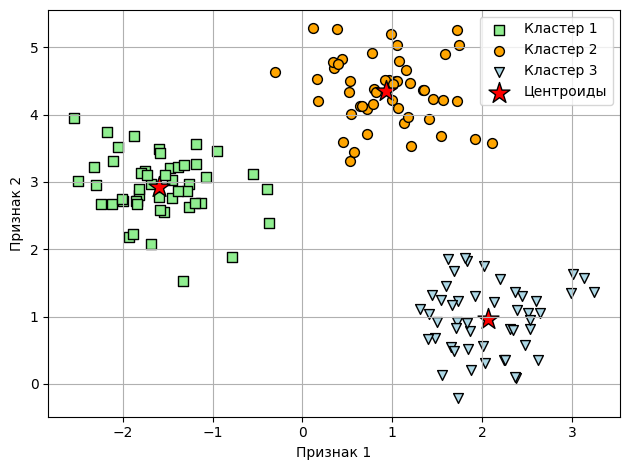

In [8]:
# Визуальное представление кластеров
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s = 50, c = 'lightgreen',
            marker = 's', edgecolor = 'black',
            label = 'Кластер 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s = 50, c = 'orange',
            marker = 'o', edgecolor = 'black',
            label = 'Кластер 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s = 50, c = 'lightblue',
            marker = 'v', edgecolor = 'black',
            label = 'Кластер 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s = 250, marker = '*',
            c = 'red', edgecolor = 'black',
            label = 'Центроиды')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend(scatterpoints = 1)
plt.grid()
plt.tight_layout()
plt.show()

Как можно видеть на рисунке, алгоритм **k-средних** поместил 3 центроида в центр каждой сферы, для этого набора данных выглядит вполне разумно.

---

<div align="center">

# Более разумный способ размещения начальных центроидов: алгоритм k-средних++

</div>

---



## Улучшение инициализации в k-средних: k-means++

### Проблема классического k-средних

* Начальные центроиды выбираются **случайно**.
* Возможные последствия:

  * плохое разбиение на кластеры,
  * медленная сходимость алгоритма.

**Решения:**

1. **Несколько запусков** алгоритма с разными случайными центроидами → выбрать модель с **минимальным SSE**.
2. **Алгоритм k-means++** → размещает начальные центроиды **далеко друг от друга**, что повышает стабильность и качество кластеризации.

---

### Инициализация центроидов в k-means++

1. Создаём пустое множество $M$ для хранения выбранных центроидов.
2. Случайным образом выбираем первый центроид $\mu^{(1)}$ из данных и добавляем его в $M$.
3. Для каждой точки $x^{(i)}$, не входящей в $M$, находим **минимальное квадратное расстояние** до любого центроида в $M$:

$$
d_{\min}^2(x^{(i)}) = \min_{\mu \in M} \| x^{(i)} - \mu \|^2
$$

4. Выбираем следующий центроид с **вероятностью, пропорциональной квадрату расстояния** $d_{\min}^2(x^{(i)})$.

   * Чем дальше точка от существующих центроидов → тем выше шанс, что она станет центроидом.
5. Повторяем шаги 3–4, пока не выберем $k$ центроидов.
6. Запускаем **классический алгоритм k-средних** с уже выбранными центроидами.

### Применение в scikit-learn


* `'k-means++'` — аргумент по умолчанию для `init`.
* Рекомендуется на практике для **лучших результатов и стабильной сходимости**.
* В старых примерах иногда использовался `init='random'` для объяснения основ.

💡 **Итог:**

* k-means++ → делает **выбор начальных центроидов более осознанным**, снижает риск плохих кластеров и ускоряет сходимость.
* Сочетается с многократными запусками (`n_init > 1`) для дополнительной надёжности.


---

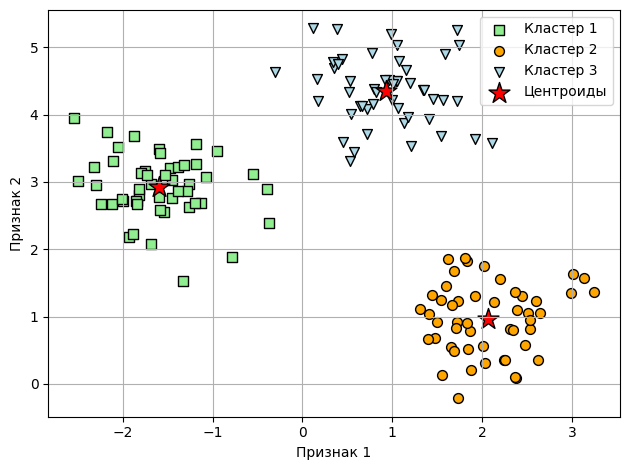

In [9]:
# Применение k-средних на демонстрационных данных для понимания
X, y = make_blobs(n_samples = 150,
                  n_features = 2,
                  centers = 3,
                  cluster_std = 0.5,
                  shuffle = True,
                  random_state = 0)


km = KMeans(n_clusters = 3, # Желаемое кол-во кластеров
            init = 'k-means++', # Инициализация центроидов k-means++
            n_init = 10, # Многократные запуски для устойчивости
            max_iter = 300, # Ограничение итераций
            tol = 1e-04, # Критерий сходимости
            random_state = 0) # Каждый запуск с этим значением будет давать одинаковый результат
y_km = km.fit_predict(X)

# Визуальное представление кластеров
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s = 50, c = 'lightgreen',
            marker = 's', edgecolor = 'black',
            label = 'Кластер 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s = 50, c = 'orange',
            marker = 'o', edgecolor = 'black',
            label = 'Кластер 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s = 50, c = 'lightblue',
            marker = 'v', edgecolor = 'black',
            label = 'Кластер 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s = 250, marker = '*',
            c = 'red', edgecolor = 'black',
            label = 'Центроиды')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend(scatterpoints = 1)
plt.grid()
plt.tight_layout()
plt.show()

<div align="center">

# Жесткая и мягкая кластеризация

</div>

---


## Жёсткая кластеризация (Hard Clustering)

* Каждая точка данных **назначается ровно одному кластеру**.
* Примеры: **k-средних, k-means++**.
* Представление принадлежности точки к кластеру: **разреженный двоичный вектор**

Пример (k = 3):

$$
w(i) = [1, 0, 0] \implies x \text{ принадлежит первому кластеру}
$$


## Мягкая (нечеткая) кластеризация (Soft/Fuzzy Clustering)

* Каждая точка может **принадлежать нескольким кластерам с разной вероятностью**.
* Популярный алгоритм: **Fuzzy C-Means (FCM)**, aka **нечеткие k-средние**.
* История:

  * 1970-е: Джозеф Дани предложил нечеткую кластеризацию для улучшения k-средних.
  * Позже Джеймс Бедзек усовершенствовал алгоритм → FCM.

### Представление принадлежности

* Вектор принадлежности $w(i,j) \in [0,1]$, сумма всех значений для точки = 1.

Пример (k = 3):

$$
w(i) = [0.85, 0.1, 0.05]
$$

* Первая компонента = 0.85 → точка сильно относится к первому кластеру.

## Алгоритм FCM (основные шаги)

1. Задать k центроидов и случайно назначить каждой точке членство в кластере.
2. Вычислить центроиды $\mu_j$ с учётом степени принадлежности:

$$
\mu_j = \frac{\sum_{i=1}^{n} (w_{ij})^m x_i}{\sum_{i=1}^{n} (w_{ij})^m}
$$

* $m \ge 1$ — **коэффициент нечеткости (фаззификатор)**.

  * Чем больше $m$, тем более размыты кластеры.

3. Обновить членство $w(i,j)$ для каждой точки.
4. Повторять шаги 2–3 до сходимости (изменения членства меньше заданного допускa или достигнут max\_iter).

## Целевая функция FCM

* Минимизируем **взвешенную внутрикластерную SSE**:

$$
J_m = \sum_{i=1}^{n} \sum_{j=1}^{k} (w_{ij})^m \| x_i - \mu_j \|^2
$$

* Отличие от k-средних:

  * $w_{ij} \in [0,1]$, а не двоичное 0/1.
  * m > 1 → управляет степенью «нечеткости».

## Основные особенности FCM

* Каждая итерация **дороже**, чем в k-средних (из-за взвешивания и вероятностей).
* Обычно требует **меньше итераций** для сходимости.
* В практике результаты FCM и k-средних часто **очень похожи**.
* Реализация: не входит в scikit-learn, можно использовать пакет **scikit-fuzzy**.


💡 **Сравнение наглядно:**

| Параметр                 | Жёсткая (k-средние)       | Мягкая (FCM)                       |
| ------------------------ | ------------------------- | ---------------------------------- |
| Принадлежность точки     | 1 кластер                 | несколько кластеров с вероятностью |
| Вектор членства $w(i,j)$ | {0,1}                     | \[0,1], сумма=1                    |
| Целевая функция          | SSE                       | Взвешенная SSE                     |
| Итерации                 | Быстрее на одной итерации | Дороже, но часто меньше итераций   |
| Реализация               | scikit-learn              | scikit-fuzzy                       |


---

<div align="center">

# Использование метода локтя для нахождения оптимального кол-ва кластеров

</div>

---


## Внутренние метрики

* **Цель:** количественно оценить качество кластеризации без внешних меток.
* **Примеры:**

  * **Внутрикластерная сумма квадратов ошибок (SSE, или distortion/inertia)** — измеряет, насколько точки близки к своим центроидам.
* В **scikit-learn**:

  * Атрибут `inertia_` объекта `KMeans` содержит **SSE после обучения**.
  * Явно вычислять SSE не требуется.

## Метод локтя (Elbow Method)

* Используется для **выбора оптимального количества кластеров $k$**.

* Идея:

  1. Строим график SSE (inertia) в зависимости от $k$.
  2. SSE уменьшается при увеличении $k$ (точки ближе к центроидам).
  3. Оптимальное $k$ находится в точке, где **резкое уменьшение SSE начинает замедляться** — формируется «локоть».

* **Интуиция:**

  * Малое $k$ → SSE большое (кластеров мало, точки далеки от центроидов).
  * Большое $k$ → SSE маленькое, но увеличение числа кластеров уже мало улучшает SSE.
  * «Локоть» = компромисс между **количеством кластеров** и **качество кластеризации**.


**Важное замечание:**

* Метод локтя даёт **ориентировочное k**, окончательное решение можно уточнять с помощью других метрик (например, силуэтного коэффициента).
* SSE — внутренняя метрика, не требует внешних меток классов.

---

* Метод локтя помогает **выбрать количество сегментов клиентов** на основе SSE (внутрикластерной ошибки).
* Иногда на графике появляется **несколько «локтей»** — это отражает, что данные могут делиться на крупные сегменты и подгруппы.
* **Практическое правило:**

  * Первый локоть → простая, легко объяснимая сегментация (например, 3–4 группы клиентов).
  * Второй локоть → более детальная сегментация для углубленного анализа (например, подгруппы внутри основных сегментов).
* Выбор k зависит от **цели бизнеса** и **интерпретируемости результатов**: проще объяснить меньшее количество сегментов, иногда полезно учитывать подкластеры.
* Для надежности комбинируют метод локтя с другими метриками, например **силуэт** или **Davies-Bouldin index**, чтобы убедиться, что кластеры хорошо разделены.


In [10]:
# Метрика внутрикластерного SSE (Искажение)
print(f'Искажение: {km.inertia_:.2f}')

Искажение: 72.48


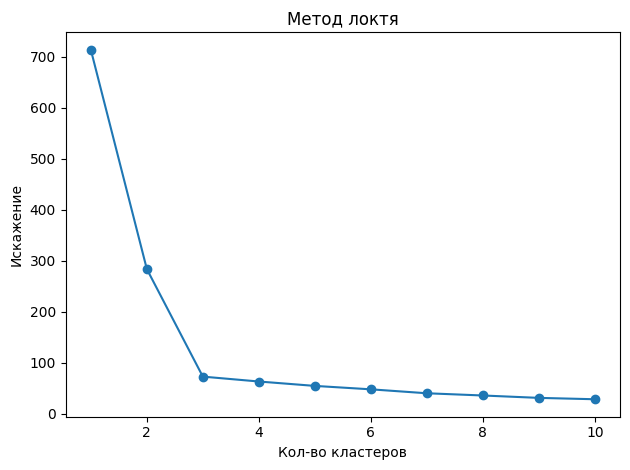

In [11]:
# График искажения для различных k значений
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Искажение')
plt.title('Метод локтя')
plt.tight_layout()
plt.show()
     

Как видно на графике, **локоть** образуется при **k = 3**, из чего можно сделать вывод, что **k = 3** является хорошим выбором для текущего набора данных.

---

<div align="center">

# Количественная оценка качества кластеризации с помощью силуэтных графиков

</div>

---


# Силуэтный анализ (Silhouette Analysis)

## Цель

* Измерить, насколько **плотно сгруппированы точки в кластерах** и насколько **различны кластеры между собой**.
* Может применяться к любым алгоритмам кластеризации, не только к k-средних.

## Вычисление силуэтного коэффициента для одной точки $x_i$

1. **Компактность кластера (cohesion)**

$$
a(i) = \text{среднее расстояние между точкой } x_i \text{ и всеми другими точками в том же кластере}
$$

2. **Отделимость кластера (separation)**

$$
b(i) = \text{среднее расстояние между точкой } x_i \text{ и всеми точками в ближайшем другом кластере}
$$

3. **Силуэтный коэффициент**

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

* $s(i) \in [-1, 1]$
* Интерпретация:

  * $s(i) \approx 1$ → точка хорошо принадлежит своему кластеру и далека от соседних кластеров.
  * $s(i) \approx 0$ → точка на границе между кластерами.
  * $s(i) < 0$ → точка может быть назначена неправильному кластеру.


## Силуэтная метрика для всего набора данных

* **Средний силуэтный коэффициент:**

$$
\text{silhouette score} = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

* Показывает **общее качество кластеризации**: чем ближе к 1, тем лучше.


💡 **Интуиция:**

* Силуэтный анализ помогает **визуально и количественно** определить, насколько естественна структура кластеров, и выбрать оптимальное k наряду с методом локтя.

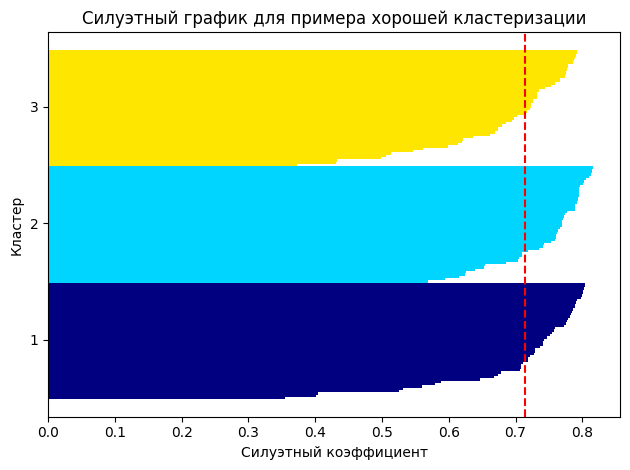

In [15]:
# График силуэтных коэффицентов с k = 3
km = KMeans(n_clusters = 3,
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0)

y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(
    X, y_km, metric = 'euclidean'
)
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height = 1.0,
             edgecolor = 'none',
             color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color = 'red',
            linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Силуэтный коэффициент')
plt.title('Силуэтный график для примера хорошей кластеризации')
plt.tight_layout()
plt.show()

Как видно на силуэтном графике, можно уточнить размеры кластеров и определить кластеры, содержащие выбросы. Здесь **Силуэтные коэффициенты** не блзки к 0 и примерно одинаково далеки от среднего, что в нашем случае является показателем хорошей кластеризации. Красная пунктирная линия - это средний силуэтный коэффициент, для обобщения способности нашей кластеризации. 

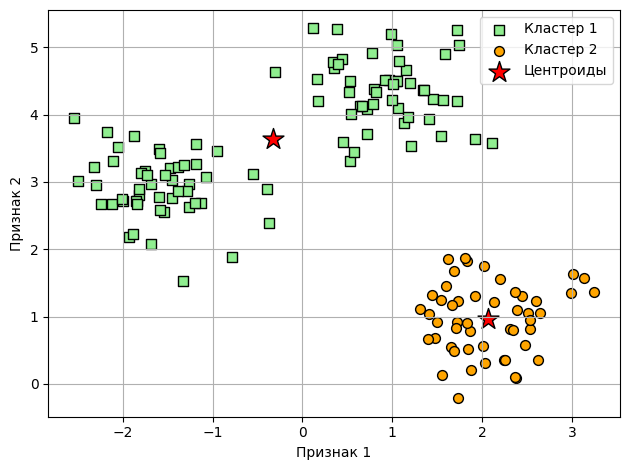

In [20]:
# Силуэтный график для относительно плохой кластеризации

km = KMeans(n_clusters = 2, # Желаемое кол-во кластеров
            init = 'k-means++', # Инициализация центроидов k-means++
            n_init = 10, # Многократные запуски для устойчивости
            max_iter = 300, # Ограничение итераций
            tol = 1e-04, # Критерий сходимости
            random_state = 0) # Каждый запуск с этим значением будет давать одинаковый результат
y_km = km.fit_predict(X)

# Визуальное представление кластеров
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s = 50, c = 'lightgreen',
            marker = 's', edgecolor = 'black',
            label = 'Кластер 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s = 50, c = 'orange',
            marker = 'o', edgecolor = 'black',
            label = 'Кластер 2')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s = 250, marker = '*',
            c = 'red', edgecolor = 'black',
            label = 'Центроиды')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend(scatterpoints = 1)
plt.grid()
plt.tight_layout()
plt.show()

>Как видно, один из центроидов оказался между двумя из трех сферичиских груп входных данных, кластеризация выглядит не прям ужасно, но она неоптимальна.

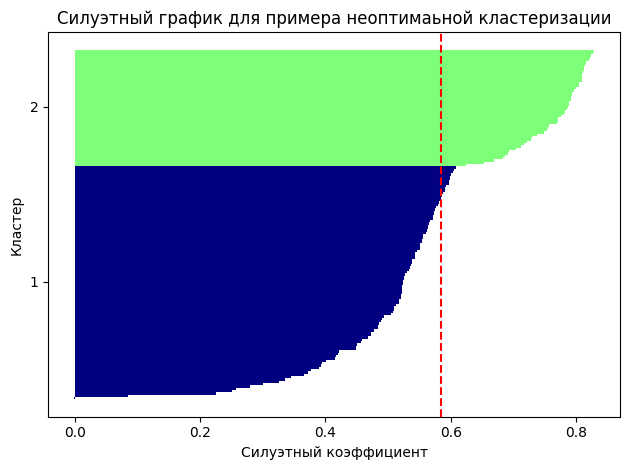

In [21]:
# График силуэтных коэффицентов с k = 2
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(
    X, y_km, metric = 'euclidean'
)
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height = 1.0,
             edgecolor = 'none',
             color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color = 'red',
            linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Силуэтный коэффициент')
plt.title('Силуэтный график для примера неоптимаьной кластеризации')
plt.tight_layout()
plt.show()

>Теперь на рисунке можно заметить, что силуэты имеют разную длину и ширину, что свидетельствует об относительно плохой или неоптимальной кластеризации.